C:\Users\offne\Documents\GitHub\CEGE0004
      communityname state  countyCode  communityCode  fold  population  \
0    Marpletownship    PA        45.0        47616.0     1       23123   
1        Tigardcity    OR         NaN            NaN     1       29344   
2  Gloversvillecity    NY        35.0        29443.0     1       16656   
3       Bemidjicity    MN         7.0         5068.0     1       11245   
4   Springfieldcity    MO         NaN            NaN     1      140494   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           2.82          0.80         95.57          3.44  ...        57.0   
1           2.43          0.74         94.33          3.43  ...       274.0   
2           2.40          1.70         97.35          0.50  ...       225.0   
3           2.76          0.53         89.16          1.17  ...        91.0   
4           2.45          2.51         95.65          0.90  ...      2094.0   

   burglPerPop  larcenies  larcPerPop  

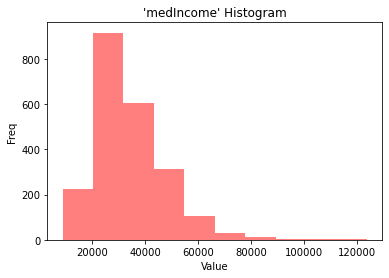

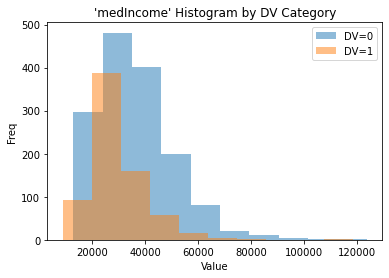

In [73]:
# load preprocessed data
%pwd  #look at the current work dir
%cd C:\\Users\\offne\\Documents\\GitHub\\CEGE0004
%run Preprocessing.ipynb

# Neural Networks

https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

**Data Preprocessing**

The neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [75]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Train the Model

Now it is time to train our model. We create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes.

For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model.

There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set along with 500 max iterations.

Try playing around with the number of hidden layers and neurons and see how they effect the results of your neural network in Python.

In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(x_train,y_train)

# Other model parameters to consider...
# MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#        beta_2=0.999, early_stopping=False, epsilon=1e-08,
#        hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
#        learning_rate_init=0.001, max_iter=500, momentum=0.9,
#        nesterovs_momentum=True, power_t=0.5, random_state=None,
#        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
#        verbose=False, warm_start=False)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

# Predictions

In [77]:
y_pred = mlp.predict(x_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[283 154]
 [ 98 130]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       437
           1       0.46      0.57      0.51       228

    accuracy                           0.62       665
   macro avg       0.60      0.61      0.60       665
weighted avg       0.65      0.62      0.63       665

Accuracy: 0.6210526315789474


The downside however to using a Multi-Layer Perceptron model is how difficult it is to interpret the model itself. The weights and biases won’t be easily interpretable in relation to which features are important to the model itself.

However, if you do want to extract the MLP weights and biases after training your model, you use its public attributes coefs_ and intercepts_.

**coefs_** is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.

**intercepts_** is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [78]:
len(mlp.coefs_)

4

In [79]:
len(mlp.coefs_[0])

103

In [80]:
len(mlp.intercepts_[0])

13

Other resources:

https://humboldt-wi.github.io/blog/research/information_systems_1819/02lstmgruandbeyond/

https://www.dummies.com/programming/python/how-to-build-a-simple-neural-network-in-python/

# Random forest classifier

https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

In [91]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters

clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [92]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7323308270676692
